### 휴먼지능정보공학과 201910803 박채희

## 문제 1의 답

In [163]:
%%writefile src/test1.js
console.log('1-1: ');
var info=JSON.stringify(admin.nodeInfo);
//console.log(info) 
ip=JSON.parse(info).ip
chainid=JSON.parse(info).protocols.eth.config.chainId;
var isPrivate;
if (chainid>5){
    isPrivate="private network";
}
else{
    isPrivate="public network";
}
console.log('Your chainId ',chainid,'@',ip,'is a',isPrivate);

miner.setEtherbase(eth.accounts[0]);
console.log('\n2\n')
console.log('-Before\n');
console.log('\t -coinbase balance in Wei:',eth.getBalance(eth.accounts[0]),'Ether: ',web3.fromWei(eth.getBalance(eth.accounts[0]),"ether"));
console.log('\t -account1 balance in Wei:',eth.getBalance(eth.accounts[1]),'Ether: ',web3.fromWei(eth.getBalance(eth.accounts[1]),"ether"));
console.log('\t transaction count: ',eth.getTransactionCount(eth.accounts[0]));
var btb=eth.getBalance(eth.accounts[1]);
var bt=eth.getTransactionCount(eth.accounts[0]);

web3.personal.unlockAccount(web3.eth.coinbase,'');
console.log('\n3\n')
var trans=eth.sendTransaction({from:eth.coinbase, to:eth.accounts[1], value:web3.toWei(0.00000000000010101,"ether")});
console.log('...mining start',trans);
miner.start(1);admin.sleepBlocks(1);miner.stop();
console.log('mining done...\n');

console.log('\n4\n')
console.log('-After\n');
console.log('\t -coinbase balance in ether: ',web3.fromWei(eth.getBalance(eth.accounts[0]),"ether"));
console.log('\t -account1 balance in ether: ',web3.fromWei(eth.getBalance(eth.accounts[1]),"ether"),'increased by ',eth.getBalance(eth.accounts[1])-btb);
console.log('\t transaction count: ',eth.getTransactionCount(eth.accounts[0]),'increased by ',eth.getTransactionCount(eth.accounts[0])-bt);
var transRe=JSON.stringify(eth.getTransactionReceipt(trans))
var gasused=JSON.parse(transRe).gasUsed
console.log('\t gas used: ',web3.fromWei(gasused),'won (1 ether = 2500000):',web3.fromWei(gasused)*2500000);

Overwriting src/test1.js


In [164]:
!geth --exec "loadScript('src/test1.js')" attach http://localhost:8446

1-1: 
Your chainId  36 @ 218.148.204.70 is a private network

2

-Before

	 -coinbase balance in Wei: 494999999999996767680 Ether:  494.99999999999676768
	 -account1 balance in Wei: 180000000000003232320 Ether:  180.00000000000323232
	 transaction count:  32

3

...mining start 0xd8c02ee4920c9ec6e33a9cbd60168462e54838460ac06fa1d5d048424def2946
mining done...


4

-After

	 -coinbase balance in ether:  499.99999999999666667
	 -account1 balance in ether:  180.00000000000333333 increased by  98304
	 transaction count:  33 increased by  1
	 gas used:  0.000000000000021 won (1 ether = 2500000): 5.25e-8
null



## 문제 2의 답

## 2-1

In [238]:
%%writefile src/Math.sol
pragma solidity ^0.4.25;
contract Math {
    function powerOf2(uint x) public pure returns (uint){
        return 2**x;
    }
}

Writing src/Math.sol


In [102]:
!solc --abi --gas --bin src/Math.sol


======= src/Math.sol:Math =======
Gas estimation:
construction:
   87 + 37400 = 37487
external:
   powerOf2(uint256):	1876
Binary: 
608060405234801561001057600080fd5b5060bb8061001f6000396000f300608060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063bdacc0cf146044575b600080fd5b348015604f57600080fd5b50606c600480360381019080803590602001909291905050506082565b6040518082815260200191505060405180910390f35b60008160020a90509190505600a165627a7a723058209d403754c4c043a0b37bed207504c9cb39349b1ed6b07a8c8cb60022141c59520029
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


## 2-2

In [173]:
!geth --exec "eth.accounts" attach "http://localhost:8446"

["0x57debf2e94a2ec946b3e41e4f1640dee925dc147", "0x5e79b3fff0b06a1aca9468ef10a3132223775b56", "0x40e978627fbd22b49d2664361d1deb58a6f7b936", "0xb7ca0feaadf41bb936d7e7e38276984912fa9313", "0x8a4e7436534e5fb9149be4b20c1a0fef0adf2a15", "0xc5f88d421272514d793a8287e1cbf43a2616de47", "0x4d1b6f0d14d9033c36022b3b7ec35b69a29c6a95", "0x9c25cc261abdab3258e47ccaf5d493b4a6e1ad93", "0xf7e33c4c7c9b7405b18f498a9a2f7dec02b5b746", "0x16ca213b8299014de96e1346feda8c9ce0a3c213"]


In [177]:
%%writefile src/MathDeploy.js
var Web3=require('web3');
var web3;

if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
}
var _abiArray=[{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var _bin="608060405234801561001057600080fd5b5060bb8061001f6000396000f300608060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063bdacc0cf146044575b600080fd5b348015604f57600080fd5b50606c600480360381019080803590602001909291905050506082565b6040518082815260200191505060405180910390f35b60008160020a90509190505600a165627a7a723058209d403754c4c043a0b37bed207504c9cb39349b1ed6b07a8c8cb60022141c59520029";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x57debf2e94a2ec946b3e41e4f1640dee925dc147",gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/MathDeploy.js


In [178]:
!node src/mathDeploy.js

0xB4E8F46bd3A6C87d624C83b203B3deD958ab8c36


## 2-3

In [179]:
%%writefile src/MathUse.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
var abi =[{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}];
var addr = "0xB4E8F46bd3A6C87d624C83b203B3deD958ab8c36";
var res = new web3.eth.Contract(abi,addr);
res.methods.powerOf2(8).call().then(function(str) {console.log(str);});
res.methods.powerOf2(32).call().then(function(str) {console.log(str);});

Overwriting src/MathUse.js


In [180]:
!node src/MathUse.js

256
4294967296


## 2-4

In [197]:
%%writefile scripts/powerOf2.html
<!doctype>
<html>
<head>
<script src="https://cdn.jsdelivr.net/npm/web3@1.2.7/dist/web3.min.js"></script>
<script type="text/javascript">
    var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
    function res(str){
        var shelloContract = new web3.eth.Contract([{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}],
                                      "0xB4E8F46bd3A6C87d624C83b203B3deD958ab8c36");
        shelloContract.methods.powerOf2(str).call().then(function(str){
             document.getElementById('powerOf2').innerText=str;
        })};
</script>
</head>
<body>
    <h1>powerOf2</h1>
    <button type="button" onClick="res(8);">result 2^8</button>
    <div></div>
    <button type="button" onClick="res(32);">result 2^32</button>
    <div></div>
    <div id="powerOf2"></div>
</body>

Overwriting scripts/powerOf2.html


In [198]:
from IPython.display import Image

### 버튼을 2개만들어서 왼쪽은 2^8의 버튼을 눌렀을 때, 오른쪽은 2^32를 눌렀을 때 결과입니다.

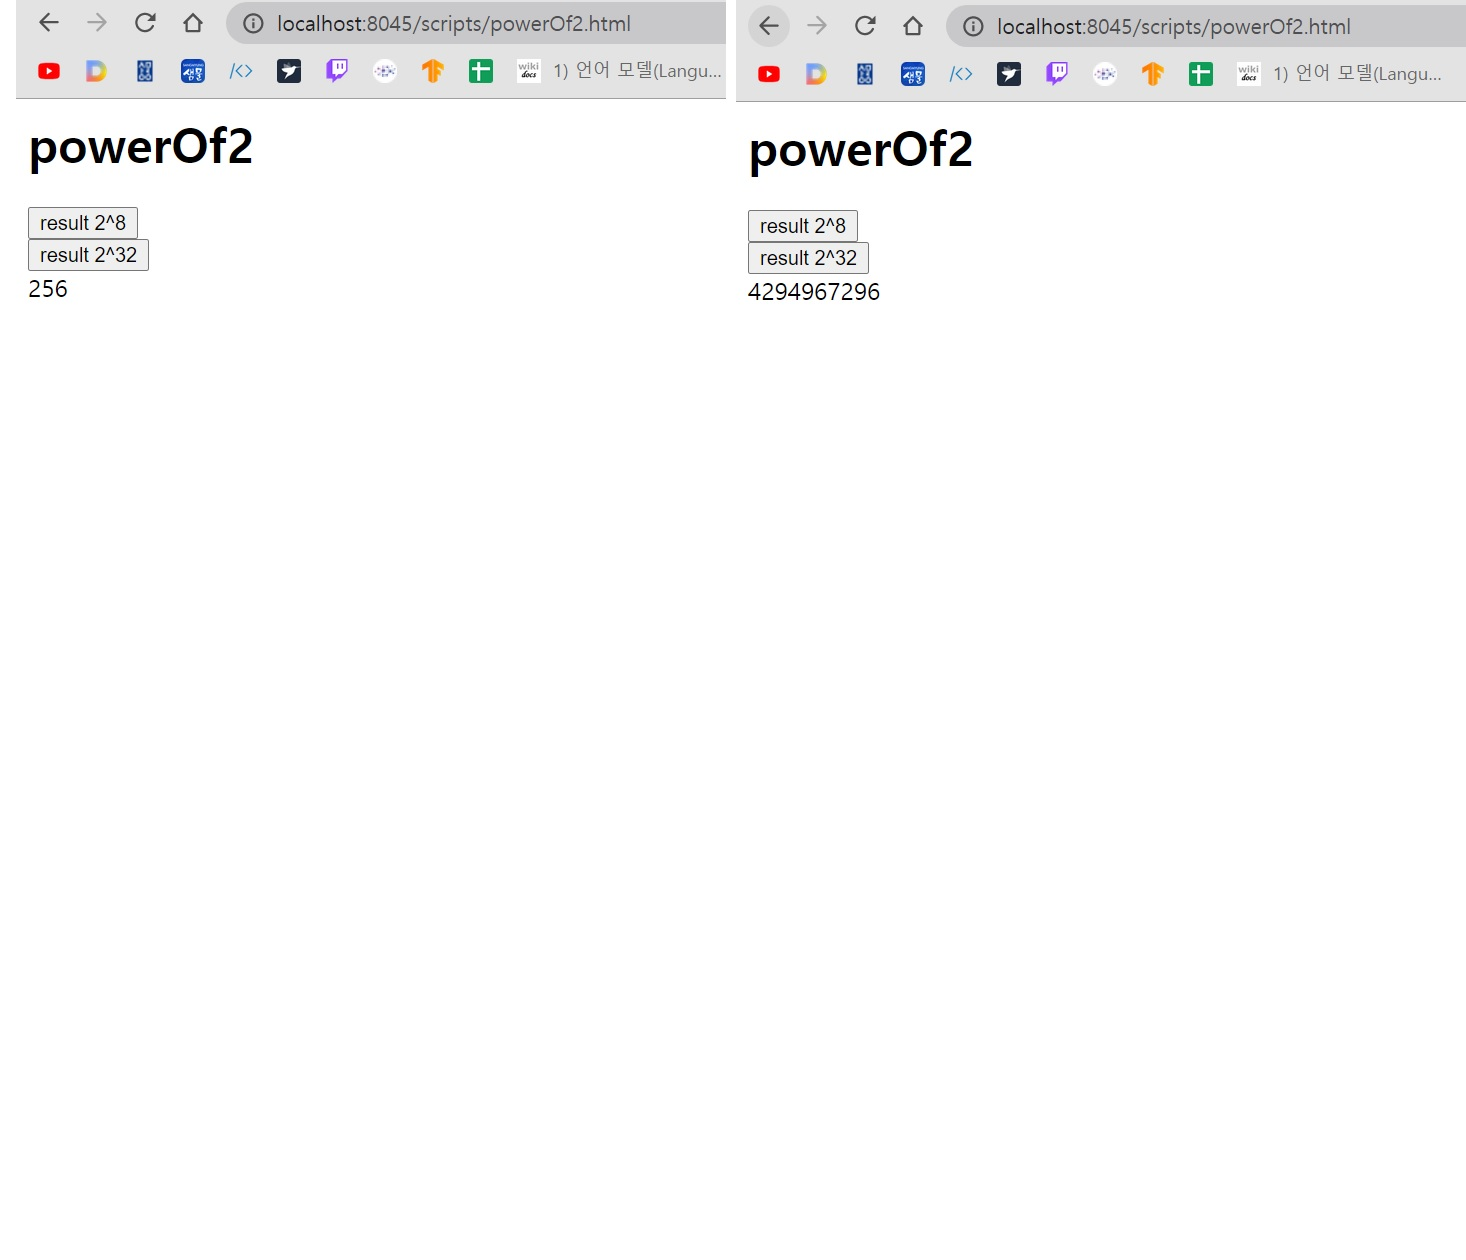

In [200]:
Image("screenshot.jpg")

## 2-5

In [254]:
!echo | set /p="exports.compiled=" > src\MathABI.json
!solc --optimize --combined-json abi src\Math.sol > src\MathABI.json

In [260]:
!echo | set /p="exports.compiled=" > src\MathBIN.json
!solc --optimize --combined-json bin src\Math.sol > src\MathBIN.json

In [261]:
!type src\MathABI.json

{"contracts":{"src\\Math.sol:Math":{"abi":"[{\"constant\":true,\"inputs\":[{\"name\":\"x\",\"type\":\"uint256\"}],\"name\":\"powerOf2\",\"outputs\":[{\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"pure\",\"type\":\"function\"}]"}},"version":"0.4.25+commit.59dbf8f1.Windows.msvc"}


In [262]:
!type src\MathBIN.json

{"contracts":{"src\\Math.sol:Math":{"bin":"6080604052348015600f57600080fd5b50609c8061001e6000396000f300608060405260043610603e5763ffffffff7c0100000000000000000000000000000000000000000000000000000000600035041663bdacc0cf81146043575b600080fd5b348015604e57600080fd5b506058600435606a565b60408051918252519081900360200190f35b60020a905600a165627a7a72305820399ebc714ffb3be8f5dd7b407e4f0f209eb7e07db7fefd74e63d39cb22a9a26f0029"}},"version":"0.4.25+commit.59dbf8f1.Windows.msvc"}


In [263]:
%%writefile src/MathImportTest.js
var _abiJson = require('./MathABI.json');
var _binJson = require('./MathBIN.json');
contractName=Object.keys(_abiJson.contracts); 
console.log("- contract name: ", contractName[0]); //or console.log(contractName);

_abi=_abiJson.contracts[contractName].abi
_bin=_binJson.contracts[contractName].bin
console.log("- ABI: ", _abi);
console.log("- Bytecode: ", _bin);

Overwriting src/MathImportTest.js


In [264]:
!node src/MathImportTest.js

- contract name:  src\Math.sol:Math
- ABI:  [{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]
- Bytecode:  6080604052348015600f57600080fd5b50609c8061001e6000396000f300608060405260043610603e5763ffffffff7c0100000000000000000000000000000000000000000000000000000000600035041663bdacc0cf81146043575b600080fd5b348015604e57600080fd5b506058600435606a565b60408051918252519081900360200190f35b60020a905600a165627a7a72305820399ebc714ffb3be8f5dd7b407e4f0f209eb7e07db7fefd74e63d39cb22a9a26f0029


In [286]:
!echo | set /p="var _compiled=" >src\MathAbiBinFromFile.js
!solc --optimize --combined-json abi,bin,interface src\MathABI.json>>src\MathAbiBinFromFile.js

src\MathABI.json:1:1: Error: Expected pragma, import directive or contract/interface/library definition.
 ... { ... 
     ^


In [283]:
%%writefile src/MathAbiBinFromFile.js
var Web3=require('web3');
var _abiJson = require('./TimerABI.json');
var _binJson = require('./TimerBIN.json');

var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));
}

///contractName=Object.keys(_abiJson.contracts); 
//console.log("- contract name: ", contractName[0]); 
//_abiArray=JSON.parse(_abiJson.contracts[contractName].abi);
//_bin=_binJson.contracts[contractName].bin;
//console.log("- ABI: " + _abiArray);
//console.log("- Bytecode: " + _bin);

//var _contract = new web3.eth.Contract(_abiArray);
//_contract
//    .deploy({data:"0x"+_bin})
//    .send({from: "0x57debf2e94a2ec946b3e41e4f1640dee925dc147", gas: 364124, gasPrice: '1000000000'})
//    .then(function(newContractInstance){
//       console.log("- Contract Address: "+newContractInstance.options.address) // instance with the new contract address
//    });

Overwriting src/MathAbiBinFromFile.js


In [284]:
!node src/MathDeployAbiBinFromFile.js

internal/modules/cjs/loader.js:883
  throw err;
  ^

Error: Cannot find module 'C:\Users\chaeh\co\201910803\src\MathDeployAbiBinFromFile.js'
    at Function.Module._resolveFilename (internal/modules/cjs/loader.js:880:15)
    at Function.Module._load (internal/modules/cjs/loader.js:725:27)
    at Function.executeUserEntryPoint [as runMain] (internal/modules/run_main.js:72:12)
    at internal/main/run_main_module.js:17:47 {
  code: 'MODULE_NOT_FOUND',
  requireStack: []
}


In [ ]:
%%writefile src/MathUse.js
var Web3=require('web3');
var _abiJson = require('./MathABI.json');
var _binJson = require('./MathBIN.json');

var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8446"));

contractName=Object.keys(_abiJson.contracts); 
console.log("- contract name: ", contractName[0]); 
_abiArray=JSON.parse(_abiJson.contracts[contractName].abi); //JSON parsing needed!!
_bin=_binJson.contracts[contractName].bin;
var _instance = new web3.eth.Contract(_abiArray,"contract주소가 들어가야함");
console.log(_instance.powerOf2(8));
console.log(_instance.powerOf2(32))

## 2-6

In [201]:
%%writefile src/MathGeth.sol
pragma solidity ^0.4.25;
contract Math {
    function powerOf2(uint x) public pure returns (uint){
        return 2**x;
    }
}

Writing src/MathGeth.sol


In [202]:
!solc --abi --bin --gas src/MathGeth.sol


======= src/MathGeth.sol:Math =======
Gas estimation:
construction:
   87 + 37400 = 37487
external:
   powerOf2(uint256):	1876
Binary: 
608060405234801561001057600080fd5b5060bb8061001f6000396000f300608060405260043610603f576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063bdacc0cf146044575b600080fd5b348015604f57600080fd5b50606c600480360381019080803590602001909291905050506082565b6040518082815260200191505060405180910390f35b60008160020a90509190505600a165627a7a72305820f23ec20aec6a2af79b867b7de1644ed1e674701f1a4b714576928d11f4cf614e0029
Contract JSON ABI 
[{"constant":true,"inputs":[{"name":"x","type":"uint256"}],"name":"powerOf2","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"pure","type":"function"}]


In [203]:
!echo | set /p="exports._compiled=" >src\MathGeth.js
!solc --optimize --combined-json abi,bin,interface src/MathGeth.sol>>src\MathGeth.js

In [204]:
!type src\MathGeth.js

exports._compiled={"contracts":{"src/MathGeth.sol:Math":{"abi":"[{\"constant\":true,\"inputs\":[{\"name\":\"x\",\"type\":\"uint256\"}],\"name\":\"powerOf2\",\"outputs\":[{\"name\":\"\",\"type\":\"uint256\"}],\"payable\":false,\"stateMutability\":\"pure\",\"type\":\"function\"}]","bin":"6080604052348015600f57600080fd5b50609c8061001e6000396000f300608060405260043610603e5763ffffffff7c0100000000000000000000000000000000000000000000000000000000600035041663bdacc0cf81146043575b600080fd5b348015604e57600080fd5b506058600435606a565b60408051918252519081900360200190f35b60020a905600a165627a7a7230582025bab6af40cbc6ce02e22e8fe40087a003e4f6188bfad3729b0d406f48dfbc120029"}},"version":"0.4.25+commit.59dbf8f1.Windows.msvc"}


In [212]:
!echo | set /p="var _compiled=" >src\MathGeth.js
!solc --optimize --combined-json abi,bin,interface src\MathGeth.sol>>src\MathGeth.js

In [213]:
%%writefile src/MathDeployGeth.js
var primary=eth.accounts[0];
loadScript('src/MathGeth.js')
contractName=Object.keys(_compiled.contracts)
_abi=JSON.parse(_compiled.contracts[contractName[0]].abi)   
_code=_compiled.contracts[contractName[0]].bin              
_class=eth.contract(_abi);
console.log('bin code: ', _code)
_object=_class.new({from:primary,data:'0x'+_code,gas:1000000}, function(err, contract) {
  if (!err && contract.address)
    console.log("contractAddress: ", contract.address);
    console.log("transactionHash: ", contract.transactionHash);
});

Overwriting src/MathDeployGeth.js


In [215]:
!geth --exec "loadScript('src/MathDeployGeth.js')" attach http://localhost:8446

bin code:  6080604052348015600f57600080fd5b50609c8061001e6000396000f300608060405260043610603e5763ffffffff7c0100000000000000000000000000000000000000000000000000000000600035041663bdacc0cf81146043575b600080fd5b348015604e57600080fd5b506058600435606a565b60408051918252519081900360200190f35b60020a905600a165627a7a7230582094253cf66a3da14b4ca19383715ab584a9c3457aaea50fb1dc430968619ad9160029
transactionHash:  0x89c6b73a5ef15342f8e4d9df4520f0f7ec25c61f63f4f43904471594dfe4538e
{
  abi: [{
      constant: true,
      inputs: [{...}],
      name: "powerOf2",
      outputs: [{...}],
      payable: false,
      stateMutability: "pure",
      type: "function"
  }],
  address: undefined,
  transactionHash: "0x89c6b73a5ef15342f8e4d9df4520f0f7ec25c61f63f4f43904471594dfe4538e"
}


In [216]:
!geth --exec "eth.getTransactionReceipt('0x89c6b73a5ef15342f8e4d9df4520f0f7ec25c61f63f4f43904471594dfe4538e')" attach http://localhost:8446

{
  blockHash: "0x4c5e2757495cd27011699f6e125eb3c705fcd5bb4697f4429b7a8d1b78ea960f",
  blockNumber: 2,
  contractAddress: "0x9ed2d1cb1902bcca2b7214ab0ef16adb4a6abcb4",
  cumulativeGasUsed: 86801,
  from: "0x57debf2e94a2ec946b3e41e4f1640dee925dc147",
  gasUsed: 86801,
  logs: [],
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  status: "0x1",
  to: null,
  transactionHash: "0x89c6b73a5ef15342f8e4d9df4520f0f7ec25c61f63f4f43904471594dfe4538e",
  transactionIndex: 0
}


In [235]:
%%writefile src/MathUseGeth.js
loadScript('src/MathGeth.js')
contractName=Object.keys(_compiled.contracts)
_abi=JSON.parse(_compiled.contracts[contractName[0]].abi)
var _contract=eth.contract(_abi);
var _address="0x9ed2d1cb1902bcca2b7214ab0ef16adb4a6abcb4";
var _instance=eth.contract(_abi).at(_address);
console.log(_instance.powerOf2(8));
console.log(_instance.powerOf2(32));

Overwriting src/MathUseGeth.js


In [236]:
!geth --exec "loadScript('src/MathUseGeth.js')" attach http://localhost:8446

256
4294967296
null
